# Análise dos Dados do Airbnb - São Francisco

Fundado em 2008, o [Airbnb] (https://www.airbnb.com.br/) revolucionou a forma como as pessoas encontram acomodações durante suas viagens. Presente em mais de 190 países, a plataforma oferece uma variedade de opções, permitindo que os usuários escapem dos padrões tradicionais de hospedagem em hotéis. Ao optar por casas e apartamentos, os viajantes podem personalizar sua experiência com base no tempo de viagem, localidade e número de pessoas, muitas vezes encontrando opções mais econômicas do que os quartos de hotéis convencionais.

Com o objetivo de estudar a extração de informação a partir de dados de empresas, este projeto mostra uma análise dos dados do Aribnb para a cidade de São Francisco, California.

<center><img alt="Analisando Airbnb" width="50%" src="https://vidacigana.com/wp-content/uploads/2018/06/como-funciona-airbnb-1-990x518.jpg"></center>

<center> Fonte: https://vidacigana.com/wp-content/uploads/2018/06/como-funciona-airbnb-1-990x518.jpg



## 0. Introdução

Neste exemplo de análise de dados, irei explorar os dados do Airbnb referentes à cidade de São Francisco, buscando compreender a disposição de residências disponíveis para aluguel e reunir informações pertinentes à nossa análise.

Localizada no norte da Califórnia, à beira da costa oeste dos Estados Unidos, São Francisco é uma cidade histórica com uma população de 873 mil habitantes. Fundada em 1776 por padres franciscanos, a cidade ganhou notoriedade a partir de 1848, quando a descoberta de ouro na região levou a um aumento significativo na população, saltando de 1000 para 25000 habitantes em apenas um ano.

Apesar de ter enfrentado desafios como o terremoto de 1906, que destruiu parte da cidade, São Francisco se recuperou rapidamente, reconstruindo-se e, nove anos após o desastre, sediando a Exposição Universal Panamá-Pacífico.

São Francisco é um destino atraente para viajantes internacionais, tendo recebido cerca de 10,2 milhões de turistas em 2022. No entanto, este número representa uma queda significativa em comparação com os aproximadamente 26 milhões de turistas que a cidade recebeu em 2019. Essa diminuição é atribuída às restrições de viagens implementadas devido à pandemia do Coronavírus

In [ ]:
# importando pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

import warnings
# Desativando temporariamente os warnings
warnings.filterwarnings("ignore")

# Configuração do tema Seaborn
sns.set_theme(style="white")

Mounted at /content/drive


## 1. Informação dos dados e limpeza dos dados


Os dados foram obtidos pelo portal [Inside Airbnb](http://insideairbnb.com/get-the-data/).Este portal oferece acesso a diversos conjuntos de dados provenientes de várias cidades, fornecidos diretamente pela própria empresa Airbnb.

O Inside Airbnb é uma plataforma que se dedica a disponibilizar informações detalhadas sobre as listagens de hospedagem, permitindo uma análise mais profunda dos padrões e tendências do mercado de aluguel. Os datasets fornecidos incluem uma variedade de informações relevantes, como localização das residências, características das propriedades, preços, disponibilidade, entre outros.

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("/content/drive/MyDrive/Data Science/Projetos e Artigos/Realizados/Airbnb/listings.csv")

Antes de iniciar a  análise, vamos verificar se está tudo certo com a importação dos dados, observando as 5 primeiras entradas.

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,138592,Home in San Francisco · ★4.91 · 4 bedrooms · 4...,648553,Julie & Brad,NaN,Noe Valley,37.75635,-122.42864,Entire home/apt,1250,5,34,2023-08-18,0.23,1,80,2,Pending Application
1,474107,Home in San Francisco · ★4.91 · 2 bedrooms · 2...,2318089,Inés,NaN,Excelsior,37.72369,-122.42865,Private room,79,2,149,2023-11-14,1.92,1,196,20,STR-0007772
2,487019,Rental unit in San Francisco · ★4.53 · 3 bedro...,2410550,Cecile,NaN,Potrero Hill,37.75622,-122.39821,Entire home/apt,249,5,36,2023-07-18,0.26,1,202,7,STR-0001599
3,487499,Rental unit in San Francisco · ★4.78 · 1 bedro...,1682183,Daniel,NaN,Mission,37.75884,-122.42232,Entire home/apt,125,30,196,2023-11-04,1.41,1,149,4,NaN
4,1163946,Condo in San Francisco · 2 bedrooms · 2 beds ·...,1918239,Jen,NaN,Mission,37.76111,-122.42082,Entire home/apt,70,30,2,2016-10-07,0.02,1,0,0,NaN


In [ ]:
def info_dados(df):
    print('Número de entradas (linhas): ', df.shape[0])
    print('\nNúmero de variáveis (colunas): ', df.shape[1])
    print("\nNomes das features:\n{}".format(df.columns.values))
    print("\nTipos de Variáveis (por coluna)\n{}".format(df.dtypes))
    print("\nValores únicos (por coluna):\n{}".format(df.nunique().sort_values(ascending=False)))
    print("\nDados ausentes (total):\t{}".format(df.isnull().sum().max()))
    print("\n Porcentagem de valores ausentes (por coluna):\n{}".format((df.isnull().sum() * 100/ df.shape[0]).sort_values(ascending=False)))

In [ ]:
info_dados(df)

Número de entradas (linhas):  8056

Número de variáveis (colunas):  18

Nomes das features:
['id' 'name' 'host_id' 'host_name' 'neighbourhood_group' 'neighbourhood'
 'latitude' 'longitude' 'room_type' 'price' 'minimum_nights'
 'number_of_reviews' 'last_review' 'reviews_per_month'
 'calculated_host_listings_count' 'availability_365'
 'number_of_reviews_ltm' 'license']

Tipos de Variáveis (por coluna)
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculate



O conjunto de dados do Airbnb para a cidade de São Francisco consiste em **8056 entradas** (linhas) e **18 variáveis** (colunas).

Predominantemente, o conjunto de dados é composto por variáveis do tipo inteiro (int64) e objetos (object). Algumas colunas, como `neighbourhood_group`, `reviews_per_month`, `last_review`, e `license`, contêm tipos de dados float64.

Algumas colunas possuem um número considerável de valores únicos, como `id` (8056), `longitude` (5898), `latitude` (5820). No caso da variável `ìd` indica que cada dado é único, sobre a alta de valroes únicos em longitude e latitude é por elas serem váraives da localização. O dataset apresenta dados ausentes em várias colunas.

A coluna `neighbourhood_group` está completamente ausente, e a `license` possui uma taxa de ausência de 36.80%. Outras colunas, como `reviews_per_month` e `last_review`, também têm uma proporção considerável de valores ausentes, atingindo 23.39%..

**Dicionário das variáveis**

* id: identificação única para o anúncio
* name: nome do anúncio
* host_id: identificador único para o proprietário do imóvel
* host_name: nome do proprietário
* neighbourhood_group: município ao qual o imóvel pertence, geolocalizado pelas coordenadas de latitude e longitude
* neighbourhood: bairro da propriedade
* latitude: coordenada geográfica de latitude da propriedade
* longitude: coordenada geográfica de longitude da propriedade
* room_type: tipo de quarto oferecido para locação
* price: preço da diária do aluguel
* minimum_nights: quantidade mínima de noites para alugar o imóvel
* number_of_reviews: quantidade de avaliações que o imóvel tem
* last_review: data da última avaliação
* reviews_per_month: quantidade de avaliações por mês
* calculated_host_listings_count : quantidade de imóveis do mesmo proprietário na mesma cidade/região
* availability_365: número de dias disponíveis para locação nos próximos 365 dias
* number_of_reviews_ltm: quantidade de avaliações nos últimos 12 meses
* license: número de registro do imóvel

In [ ]:
# descrição estatística
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.413000e+03,6.413000e+03,0.0,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,5077.000000,6413.000000,6413.000000,6413.000000
mean,2.783746e+07,8.524930e+07,NaN,37.768517,-122.429795,228.636520,24.007797,44.483861,2.055937,14.352253,166.752534,6.895057
std,1.681251e+07,1.125628e+08,NaN,0.022844,0.026904,671.915606,49.746920,85.496409,5.745197,32.645732,133.528567,16.514490
min,9.580000e+02,1.169000e+03,NaN,37.708370,-122.512460,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.331858e+07,4.440278e+06,NaN,37.753230,-122.442490,93.000000,2.000000,1.000000,0.210000,1.000000,33.000000,0.000000
50%,2.919296e+07,2.712355e+07,NaN,37.772026,-122.423260,145.000000,30.000000,7.000000,0.670000,2.000000,153.000000,1.000000
75%,4.268582e+07,1.220748e+08,NaN,37.787430,-122.410580,232.000000,30.000000,45.000000,2.130000,9.000000,306.000000,5.000000
max,5.365842e+07,4.344078e+08,NaN,37.809540,-122.368230,25000.000000,1125.000000,877.000000,162.000000,154.000000,365.000000,435.000000


A variável `price`, que representa o valor em dólares por noite do aluguel, exibe uma média de cerca de \$228,00, com 75% dos valores abaixo de \$232,00. No entanto, chama atenção o preço máximo de \$25.000,00 e o considerável desvio padrão de \$671,91. Essa distribuição sugere a presença de valores atípicos (outliers) que podem impactar a interpretação dos resultados.

Além disso, a variável `minimum_nights` revela que a média de noites mínimas para aluguel é de aproximadamente 24 noites, com 75% dos valores abaixo de 30 noites. Entretanto, o valor máximo registrado é de 1.125 noites, um patamar fora do comum para o padrão de aluguel típico do Airbnb. Este valor elevado é notável e pode ser considerado um possível outlier, demandando uma análise mais aprofundada para compreender sua origem e impacto nas conclusões do estudo.

No que diz respeito às avaliações, a quantidade média de avaliações por mês (`reviews_per_month`) é de aproximadamente 2,06, com o valor máximo de 162, considerado alto em relação à média, e o valor de 75% de 2,13, sugerindo a presença de outliers. O mesmo se aplica à variável `number_of_reviews`, com média de 44 e 75% dos dados abaixo de 45. No entanto, ela apresenta um valor máximo de 877 e desvio padrão de 85,49, indicando a possível existência de outliers que merecem investigação mais detalhada.

A variável `calculated_host_listings_count` revela uma média de 14 propriedades por usuário, mas com um desvio de aproximadamente 32 e um valor máximo de 154. Quanto à `number_of_reviews_ltm`, há um máximo de 435, com média de 6,89 e desvio padrão de 16,51. Esses dados também apontam para a presença de valores discrepantes que podem influenciar as análises, destacando a importância de considerar esses casos ao interpretar os resultados do estudo.

Irei usar o méto de IQR para identificar esses valor outlier.

In [ ]:
def outlier_boundary(dataset, column_list):
    # Itera sobre as colunas da lista passada como argumento
    for column in column_list:
        # Verifica se a coluna existe no dataset
        if column in dataset:
            # Calcula as estatísticas resumidas para a coluna
            des = dataset[column].describe()
            # Recupera o primeiro quartil (Q1)
            Q1 = des["25%"]
            # Recupera o terceiro quartil (Q3)
            Q3 = des["75%"]
            # Calcula a amplitude interquartil (IQR)
            IQR = Q3 - Q1
            # Calcula os limites superior e inferior
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            # Imprime os limites superior e inferior para a coluna
            print(f"O limite superior para a coluna {column} é {upper} e o limite inferior é {lower}.")

In [ ]:
colunas = ['price', 'minimum_nights', 'reviews_per_month', 'number_of_reviews', 'calculated_host_listings_count', 'number_of_reviews_ltm']

outlier_boundary(df, colunas)

O limite superior para a coluna price é 480.0 e o limite inferior é -136.0.
O limite superior para a coluna minimum_nights é 72.0 e o limite inferior é -40.0.
O limite superior para a coluna reviews_per_month é 4.24 e o limite inferior é -2.24.
O limite superior para a coluna number_of_reviews é 108.5 e o limite inferior é -63.5.
O limite superior para a coluna calculated_host_listings_count é 28.5 e o limite inferior é -15.5.
O limite superior para a coluna number_of_reviews_ltm é 20.0 e o limite inferior é -12.0.


Visto quais são esses valores, posso agora tratá-los. Para evitar atrapalhar outros dados e não criar nenhum viés irei apenas substituir esses valores para ausentes.

In [ ]:
import numpy as np

df_clean = df.copy()

In [ ]:
df_clean['price'] = np.where((df_clean['price'] < -136) | (df_clean['price'] > 480), np.nan, df_clean['price'])
df_clean['minimum_nights'] = np.where((df_clean['minimum_nights'] < -40) | (df_clean['minimum_nights'] > 72), np.nan, df_clean['minimum_nights'])
df_clean['number_of_reviews'] = np.where((df_clean['number_of_reviews'] < -63.5) | (df_clean['number_of_reviews'] > 108.5), np.nan, df_clean['number_of_reviews'])
df_clean['reviews_per_month'] = np.where((df_clean['reviews_per_month'] < -2.24) | (df_clean['reviews_per_month'] > 4.24), np.nan, df_clean['reviews_per_month'])
df_clean['calculated_host_listings_count'] = np.where((df_clean['calculated_host_listings_count'] < -15.5) | (df_clean['calculated_host_listings_count'] > 28.5), np.nan, df_clean['calculated_host_listings_count'])
df_clean['number_of_reviews_ltm'] = np.where((df_clean['number_of_reviews_ltm'] < -12.0) | (df_clean['number_of_reviews_ltm'] > 20), np.nan, df_clean['number_of_reviews_ltm'])

In [ ]:
# descrição estatística dos dados limpos
df_clean.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8.056000e+03,8.056000e+03,0.0,8056.000000,8056.000000,7383.000000,7863.000000,7016.000000,5746.000000,6634.000000,8056.000000,6816.000000
mean,3.092664e+17,1.478669e+08,NaN,37.769002,-122.430103,161.218069,14.248887,16.353050,0.952652,4.290021,177.644613,2.741491
std,4.133426e+17,1.780674e+08,NaN,0.023135,0.027098,94.970172,14.395581,25.011109,1.065095,5.720828,136.047253,4.496685
min,9.580000e+02,1.169000e+03,NaN,37.708480,-122.512460,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.171546e+07,6.990632e+06,NaN,37.753880,-122.442383,90.000000,2.000000,0.000000,0.180000,1.000000,33.000000,0.000000
50%,4.500022e+07,5.578278e+07,NaN,37.774207,-122.422381,135.000000,3.000000,4.000000,0.460000,2.000000,176.000000,1.000000
75%,7.630646e+17,2.635022e+08,NaN,37.787865,-122.411020,208.000000,30.000000,21.000000,1.400000,5.000000,318.000000,3.000000
max,1.037699e+18,5.490278e+08,NaN,37.809810,-122.358480,480.000000,70.000000,108.000000,4.240000,28.000000,365.000000,20.000000


In [ ]:
df_clean.to_csv(r'/content/drive/MyDrive/Data Science/Projetos e Artigos/Realizados/Airbnb/listing_clean.csv', index=False)

In [ ]:
df_clean = pd.read_csv("/content/drive/MyDrive/Data Science/Projetos e Artigos/Realizados/Airbnb/listing_clean.csv")

Após a limpeza dos outliers, é visto que as características das variáveis foram significativamente ajustadas. A média do preço (`price`) reduziu para \$161.22, com um desvio padrão de \$94.97.

A quantidade mínima de noites (`minimum_nights`) apresentou uma média de 14.25, com um desvio padrão de 14.40. A redução na dispersão dos dados sugere que a maioria das propriedades requer um número mais razoável de noites mínimas para locação, eliminando valores extremos que distorciam a média anteriormente.

A variável `number_of_reviews` agora possui uma média de 16.35, com um desvio padrão de 25.01.

A média de avaliações por mês (`reviews_per_month`) foi ajustada para 0.95, com um desvio padrão de 1.07. Esse resultado mais homogêneo sugere uma distribuição mais estável da frequência de avaliações mensais.

A média de propriedades listadas por usuário (`calculated_host_listings_count`) foi ajustada para 4.29, com um desvio padrão de 5.72. Esse ajuste indica uma distribuição mais concentrada em comparação com os dados anteriores.

Por fim, a quantidade média de avaliações nos últimos 12 meses (`number_of_reviews_ltm`) foi ajustada para 2.74, com um desvio padrão de 4.50.

A limpeza então permitiu uma distribuição mais centrada e menos influenciada por valores extremos.

## 2. Análise univariada

Numa abordagem inicial de análise de dados, acho interessante formular  algumas perguntas específicas para orientar a investigação e direcionar a visualização das informações por meio de gráficos relevantes.

A fase de análise univariada concentra-se na avaliação de uma única variável, considerando sua distribuição e proporção nos dados. Ao compreender como uma variável se distribui, pode ser visto tendências, anomalias e características distintivas. Essa abordagem proporciona uma visão detalhada dos dados, possibilitando a escolha adequada de gráficos que melhor representem as características da variável em questão.

Algumas perguntas sugeridas:

* Qual é a distribuição dos preços das diárias de aluguel?

* Quais são os tipos mais comuns de quartos oferecidos para locação? Existe uma predominância em algum tipo?

* Como a quantidade mínima de noites para alugar varia entre as propriedades?

* Como as avaliações estão distribuídas?

* Como está distribuída a quantidade de avaliações por mês?

* Como a disponibilidade ao longo do ano se distribui?

* Qual é a distribuição da quantidade de imóveis que um mesmo proprietário possui na cidade?

* Como as propriedades estão distribuídas geograficamente na cidade? Existe alguma concentração em bairros específicos?

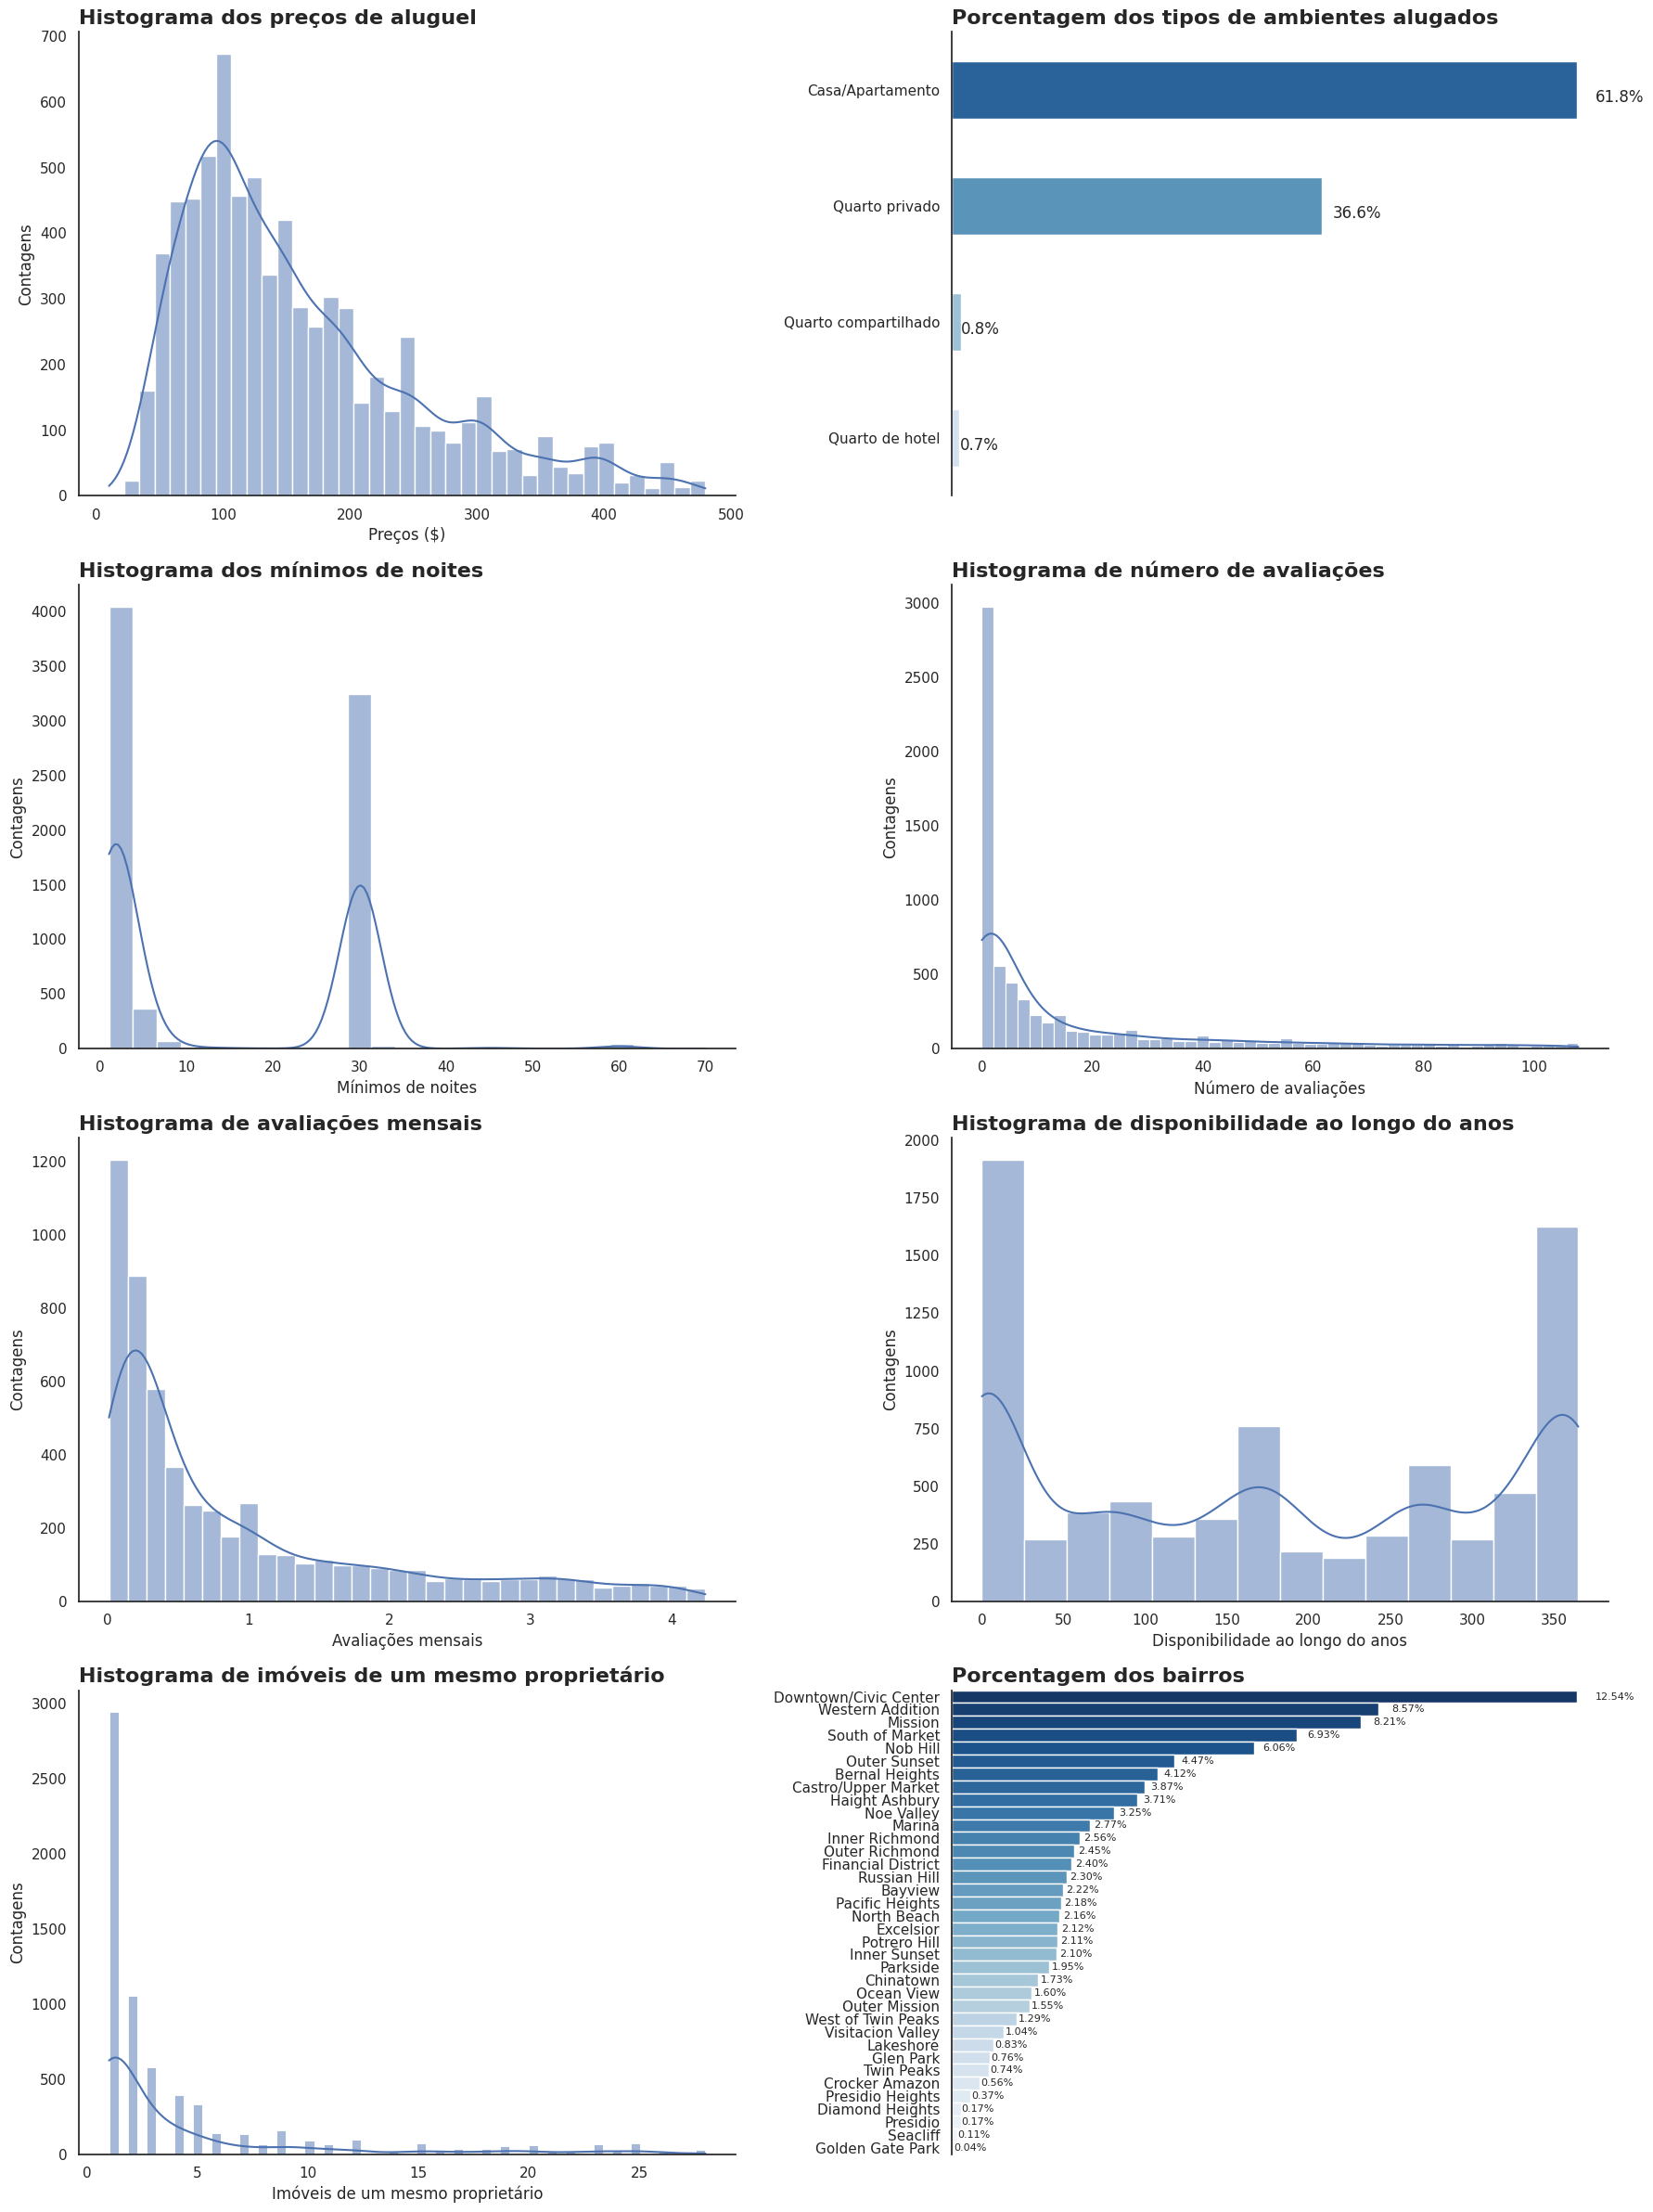

In [ ]:
# Criação de subplots
fig,  ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8))= plt.subplots(4, 2, figsize=(18, 24))

#ax1
sns.histplot(x = df_clean['price'], data = df_clean, ax= ax1, palette="Blues_r", kde=True)
ax1.set_ylabel("Contagens")
ax1.set_xlabel("Preços ($)")
ax1.set_title('Histograma dos preços de aluguel', loc = 'left', fontsize = 16, fontweight='bold')
sns.despine(ax=ax1)


#ax2
sns.countplot(y=df_clean['room_type'], data=df_clean, palette="Blues_r", width=0.5, ax= ax2)
ax2.set_title('Porcentagem dos tipos de ambientes alugados', loc = 'left', fontsize = 16, fontweight='bold')
ax2.set_xticklabels([])
ax2.set_yticklabels(["Casa/Apartamento", "Quarto privado", "Quarto compartilhado", "Quarto de hotel"])
ax2.set_ylabel(" ")
ax2.set_xlabel(" ")
sns.despine(bottom=True, ax=ax2)

total = len(df_clean['room_type'])
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_width() * 1.03
    y = p.get_y() + p.get_height() / 1.4
    ax2.annotate(percentage, (x, y), size=12)



#ax3
sns.histplot(x = df_clean['minimum_nights'], data = df_clean, ax= ax3, palette="Blues_r", kde=True)
ax3.set_ylabel("Contagens")
ax3.set_xlabel("Mínimos de noites")
ax3.set_title('Histograma dos mínimos de noites', loc = 'left', fontsize = 16, fontweight='bold')
sns.despine(ax=ax3)

#ax4
sns.histplot(x = df_clean['number_of_reviews'], data = df_clean, ax= ax4, palette="Blues_r", kde=True)
ax4.set_ylabel("Contagens")
ax4.set_xlabel("Número de avaliações")
ax4.set_title('Histograma de número de avaliações', loc = 'left', fontsize = 16, fontweight='bold')
sns.despine(ax=ax4)

#ax5
sns.histplot(x = df_clean['reviews_per_month'], data = df_clean, ax= ax5, palette="Blues_r", kde=True)
ax5.set_ylabel("Contagens")
ax5.set_xlabel("Avaliações mensais")
ax5.set_title('Histograma de avaliações mensais', loc = 'left', fontsize = 16, fontweight='bold')
sns.despine(ax=ax5)

#ax6
sns.histplot(x = df_clean['availability_365'], data = df_clean, ax= ax6, palette="Blues_r", kde=True)
ax6.set_ylabel("Contagens")
ax6.set_xlabel("Disponibilidade ao longo do anos")
ax6.set_title('Histograma de disponibilidade ao longo do anos', loc = 'left', fontsize = 16, fontweight='bold')
sns.despine(ax=ax6)

#ax7
sns.histplot(x = df_clean['calculated_host_listings_count'], data = df_clean, ax= ax7, palette="Blues_r", kde=True)
ax7.set_ylabel("Contagens")
ax7.set_xlabel("Imóveis de um mesmo proprietário")
ax7.set_title('Histograma de imóveis de um mesmo proprietário', loc = 'left', fontsize = 16, fontweight='bold')
sns.despine(ax=ax7)

#ax8
order = df_clean['neighbourhood'].value_counts().index
sns.countplot(y=df_clean['neighbourhood'], data=df_clean, palette="Blues_r", order = order, width=1, ax=  ax8)
ax8.set_title('Porcentagem dos bairros', loc = 'left', fontsize = 16, fontweight='bold')
ax8.set_xticklabels([])
ax8.set_ylabel(" ")
ax8.set_xlabel(" ")
sns.despine(bottom=True, ax=ax8)

total = len(df_clean['neighbourhood'])
for p in ax8.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width() / total)
    x = p.get_width() * 1.03
    y = p.get_y() + p.get_height() / 1.4
    ax8.annotate(percentage, (x, y), size=8)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data Science/Projetos e Artigos/Realizados/Airbnb/univariada.png', dpi = 300)
plt.show()


**Algumas conclusões sobre os gráficos:**

- Os valores de alugueis se concentram entre o míminimo de $10,00 até $200,00. Com um grande número de imóveis alugados por um valores próximos a $100,00.
- Casas/Apartamentos são os tipos de imóveis mais alugados, correspondendo a 61,8% dos aluguéis. Quartos de hotéis são os menos procurados, 0,7%.
- Os períodos de aluguel mais procurados são aqueles que variam de 0 a 5 noites, bem como estadias de 30 noites. Há uma diversidade nas necessidades dos locatários, incluindo tanto estadias temporárias quanto estendidas.
- São maiores a quantidade de avaliações entre 0 - 5.
- Grandes disponibilidades de imóveis por 350 dias e entre 0 a 25 dias.
- A maior parte dos donos de imóveis possuel apenas um imóvel. Pode indicar uma participação expressiva de proprietários individuais no Airbnb.
- 12.54% dos imóveis são de Downtown/Civic Center, seguido de Western Addition com 8,57%. Ha menos imóveis (0,04%) em Golden Gate Park.


## 3. Análise multivariada

Perguntas possíveis a serem realizadas:

- Qual a relação entre o preço e o tipo de quarto?
- A localização (bairro) influencia no número de avaliações ou no preço das diárias?
- A quantidade de imóveis em cada bairro?
- Como as avaliações afetam o preço das diárias?
- Propriedades com mais avaliações por mês tendem a ter preços mais altos?
- Existe uma relação entre a quantidade mínima de noites e a disponibilidade ao longo do ano?

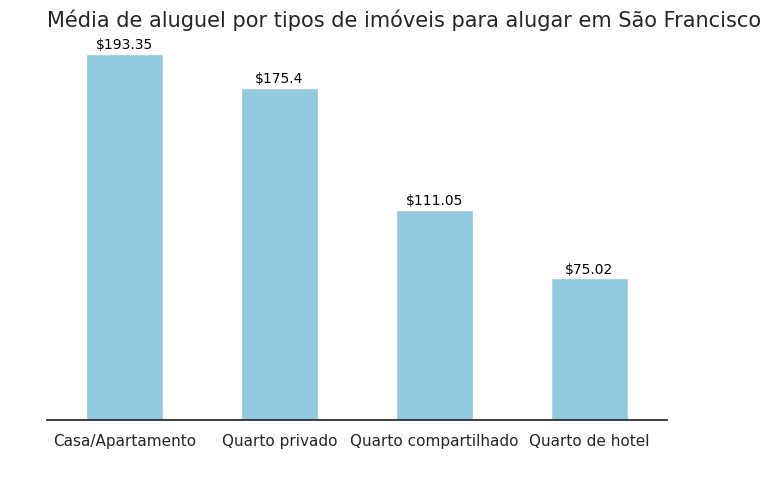

In [ ]:
price_types_room = round(df_clean.groupby('room_type').price.mean(), 2).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,5))

ax = sns.barplot(x=price_types_room.index, y=price_types_room.values, color = 'skyblue', width = 0.5)

for i, v in enumerate(price_types_room.values):
    ax.text(i, v + 1, f"${v}", color='black', ha='center', va='bottom', fontsize = 10)

ax.set_title('Média de aluguel por tipos de imóveis para alugar em São Francisco', loc='left', fontsize=15)
ax.set_xlabel(' ')
ax.set_xticklabels(["Casa/Apartamento", "Quarto privado", "Quarto compartilhado", "Quarto de hotel"])
ax.set_yticklabels([])
ax.set_ylabel(' ')
sns.despine(left = True)
# plt.savefig('media.png', dpi=100, bbox_inches='tight')


Em primeiro lugar dos tipos de imóveis mais caros está casas/apartamentos com valor médio de aluguel de \$193.3. Quartos privativos custam em média \$175.4, sendo o segundo imóvel mais caro. O mais barato dos imóveis são quartos de hotéis com valor médio de alguel de \$75.02.

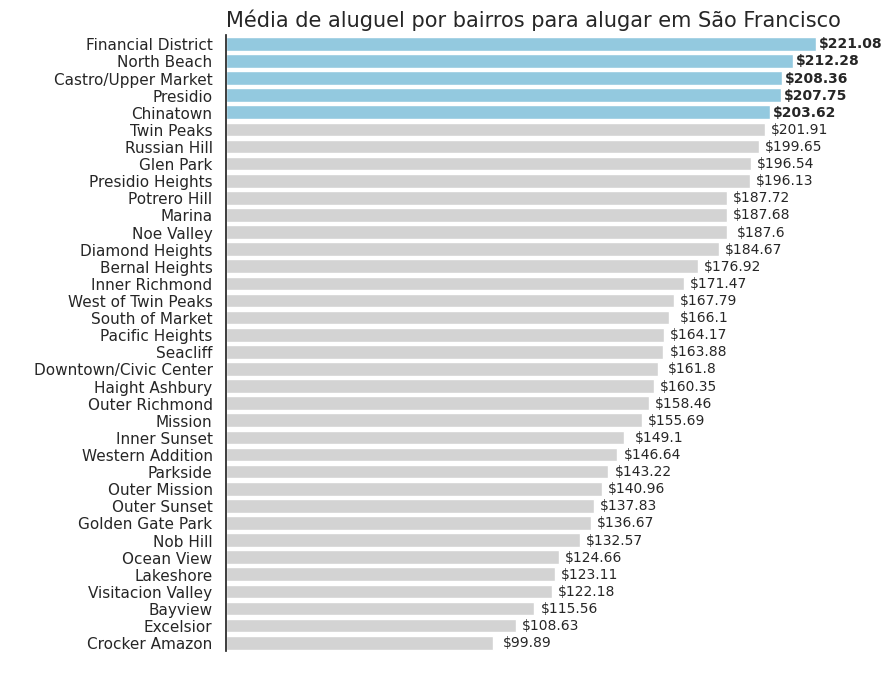

In [ ]:
price_neighbourhood = round(df_clean.groupby('neighbourhood').price.mean(), 2).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,8))

colors = ['skyblue' if i < 5 else 'lightgrey' for i in range(len(price_neighbourhood))]

ax = sns.barplot(y=price_neighbourhood.index, x=price_neighbourhood.values, palette=colors)

for i, v in enumerate(price_neighbourhood.values):
    text_font = fontweight='bold' if i < 5 else None
    ax.text(v + 13, i, f"${v}", fontweight=text_font , ha='center', va='center', fontsize=10)

ax.set_title('Média de aluguel por bairros para alugar em São Francisco', loc='left', fontsize=15)
ax.set_ylabel(' ')
ax.set_xlabel(' ')
ax.set_xticklabels([])
ax.set_ylabel(' ')
sns.despine(bottom = True)

Os cinco bairros mais caros de aluguel são Finacial District (\$221.08), North Beach (\$212.38), Castro/Upper Market (\$208.36), Presidio (\$207.75), Chinatown (\$203.32).

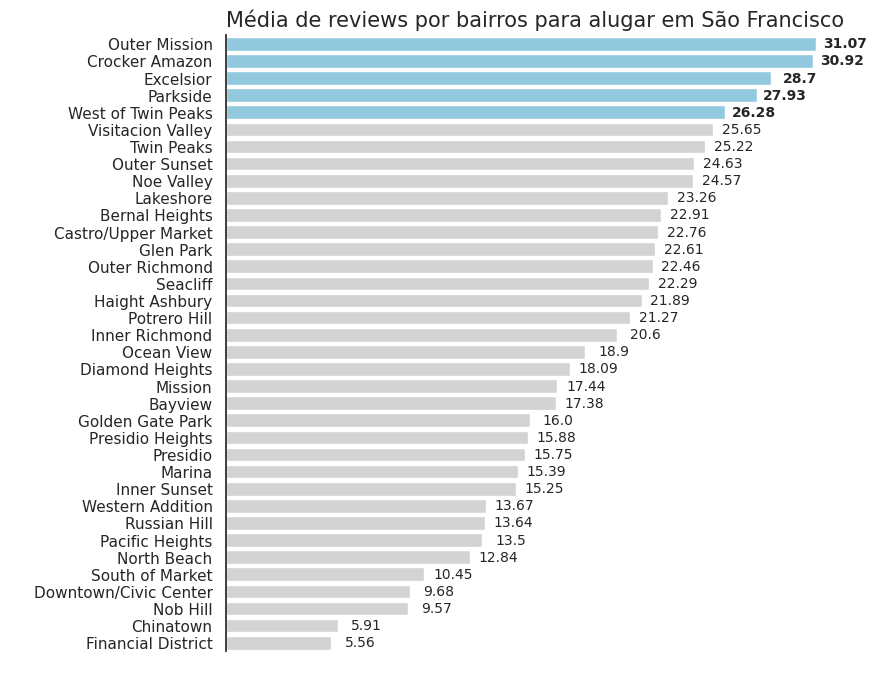

In [ ]:
reviews_neighbourhood = round(df_clean.groupby('neighbourhood').number_of_reviews.mean(), 2).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,8))

colors = ['skyblue' if i < 5 else 'lightgrey' for i in range(len(reviews_neighbourhood))]

ax = sns.barplot(y=reviews_neighbourhood.index, x=reviews_neighbourhood.values, palette=colors)

for i, v in enumerate(reviews_neighbourhood.values):
    text_font = fontweight='bold' if i < 5 else None
    ax.text(v + 1.5, i, f"{v}", fontweight=text_font , ha='center', va='center', fontsize=10)

ax.set_title('Média de reviews por bairros para alugar em São Francisco', loc='left', fontsize=15)
ax.set_ylabel(' ')
ax.set_xlabel(' ')
ax.set_xticklabels([])
ax.set_ylabel(' ')
sns.despine(bottom = True)

Se compararmos o gráfico acima sobre as reviews por bairro, temos uma situação interessante, que 2 dos bairros dos 5 mais caros, Financial Dsistrict, são os que apresentam menores médias de avaliaçãoes com 5,91 e 5,56 respectivamente.
Os 5 bairros mais bem avaliados são Outer Mission, Crocker Amazon, Excelsior e Parkside.

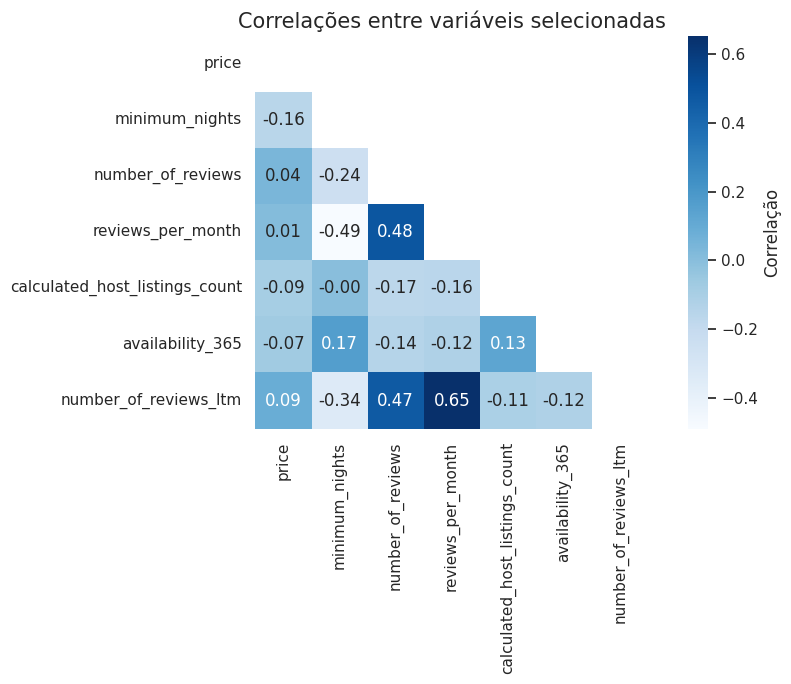

In [ ]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

import numpy as np
mask = np.triu(np.ones_like(corr, dtype=bool))
corr_no_duplicates = corr.mask(mask)

# Plotar um heatmap a partir das correlações únicas
plt.figure(figsize=(10, 7))
sns.heatmap(corr_no_duplicates, fmt='.2f', square=True, annot=True, cmap="Blues", cbar_kws={'label': 'Correlação'})
plt.title('Correlações entre variáveis selecionadas', fontsize=15)

# Ajustar layout
plt.tight_layout()
plt.show()

Conclusões sobre as correlações:

- A relação entre preço e outras variáveis é, em geral, fraca.
- O número mínimo de noites tem uma relação negativa com a disponibilidade e uma relação moderada e negativa com o número de reviews a longo prazo.
- O número de reviews está fortemente relacionado tanto com o número de reviews a longo prazo quanto com a quantidade de reviews por mês.
- A disponibilidade ao longo do ano tem uma relação fraca com várias variáveis, incluindo preço e número de reviews a longo prazo.

## 4. Conclusões

Este projeto teve o objetivo de realizar uma análise dos dados do Airbnb da cidade de São Francisco. De inicio foi nessário uma limpeza em agumas variáveis, como a avariável neighbourhood_group não possuia entradas.
Foi necessário realizar uma limpeza de outliers nas variáveis `price` e `minimum_nights`. É interessante realizar essa limpeza pois são variáveis que podem ser consideradas importantes para uma escolha de determinado lugar.

Após isso foi para facilicat o processo de análise realizei algumas perguntas para realizar uma análise univariada e multivariada.

Ao analisar os gráficos, observamos que a maioria dos aluguéis concentra-se em valores próximos a $100, com uma representação expressiva de casas/apartamentos (61,8%) e uma preferência por períodos de 0 a 5 noites. O número de avaliações predominam na faixa de 0 a 5s. A maioria dos proprietários possui apenas um imóvel, sugerindo participação significativa de indivíduos no Airbnb.

Na categorização dos imóveis por preço médio de aluguel, casas/apartamentos lideram com \$193.3, seguidos por quartos privativos (\$175.4) e quartos de hotéis (\$75.02). Os bairros mais caros incluem Financial District, North Beach, Castro/Upper Market, Presidio e Chinatown, enquanto Outer Mission, Crocker Amazon, Excelsior e Parkside são os mais bem avaliados.

As análises de correlação revelam que a relação entre preço e outras variáveis é geralmente fraca. O número mínimo de noites mostra uma relação negativa com disponibilidade e uma moderada relação negativa com o número de reviews a longo prazo. O número de reviews está fortemente relacionado tanto com os reviews a longo prazo quanto com a quantidade de reviews por mês. A disponibilidade ao longo do ano apresenta relações fracas com várias variáveis, incluindo preço e número de reviews a longo prazo.


